<a href="https://colab.research.google.com/github/JasonKeha/Exploratory_Data_Analysis-EDA-/blob/main/Forbes%20Sport%20Earnings%20(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Forbes Sport Earnings (EDA)**

*Original dataset:* (https://www.kaggle.com/datasets/gaurav126/forbes-richest-athletes-1990-2021)

### Importing the necessary libraries

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import opendatasets as od

### Connecting to our dataset

API Details

Username : itsjasonk

Key : 0fdaa64cb05419c3c1403b05d9aec00d

In [ ]:
od.download('https://www.kaggle.com/datasets/gaurav126/forbes-richest-athletes-1990-2021')

Skipping, found downloaded files in "./forbes-richest-athletes-1990-2021" (use force=True to force download)


In [ ]:
df = pd.read_csv('/content/forbes-richest-athletes-1990-2021/Forbes Richest Athletes (Forbes Richest Athletes 1990-2021).csv')
df.head()

,Name,Nationality,Earnings,Year,Sport
0,Aaron Donald,USA,36.0,2021,Football
1,Aaron Donald,USA,41.4,2019,Football
2,Aaron Rodgers,USA,30.1,2020,Football
3,Aaron Rodgers,USA,89.3,2019,Football
4,Aaron Rodgers,USA,19.1,2015,Football


### Checking our columns

In [ ]:
print("The columns are:", list(df.columns))
print("The number of columns is:", len(df.columns))

The columns are: ['Name', 'Nationality', 'Earnings', 'Year', 'Sport']
The number of columns is: 5


### Renaming the Earnings column

In [ ]:
df.rename(columns={'Earnings':'Earnings(Million)'},inplace=True)

### Formatting the Year column

In [ ]:
df['Year'] = df['Year'].apply(pd.to_datetime,format='%Y').dt.year

### Checking our shapes and datatypes

In [ ]:
print('The shape is:', df.shape)
print(f'The datatypes are:\n{df.dtypes}')
# The datatypes seem ok 

The shape is: (1659, 5)
The datatypes are:
Name                  object
Nationality           object
Earnings(Million)    float64
Year                   int64
Sport                 object
dtype: object


In [ ]:
print('There are a total of', len(df['Name'].unique()), 'athletes in this dataset')

There are a total of 535 athletes in this dataset


### Finding our missing data

In [ ]:
empty_values = df.isnull().sum().sort_values(ascending = False)
percentage = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([empty_values, percentage], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(len(df.columns))
# There are no missing data

,Total,Percent
Name,0,0.0
Nationality,0,0.0
Earnings(Million),0,0.0
Year,0,0.0
Sport,0,0.0


### Removing the duplicated rows

In [ ]:
print('The shape is', df.shape)
df.drop_duplicates()
print('The shape after removing the duplicated rows is', df.shape)
# Our dataset also has no duplicates

The shape is (1659, 5)
The shape after removing the duplicated rows is (1659, 5)


### Total earnings per sport

In [ ]:
total_Earnings_per_sport = pd.DataFrame(df.groupby('Sport').count()['Name'])
total_Earnings_per_sport['Total Earnings(Million)'] = pd.DataFrame(df.groupby('Sport').sum()['Earnings(Million)'])
total_Earnings_per_sport['Average'] = total_Earnings_per_sport['Total Earnings(Million)']/total_Earnings_per_sport['Name']
total_Earnings_per_sport = total_Earnings_per_sport.rename(columns={'Name':'Count'})
total_Earnings_per_sport

,Count,Total Earnings(Million),Average
Sport,,,
Baseball,285,5818.1,20.414386
Basketball,403,11574.8,28.721588
Boxing,100,3492.0,34.920000
Cricket,10,256.6,25.660000
Cycling,5,76.7,15.340000
Football,260,7209.9,27.730385
Football/Baseball,3,38.9,12.966667
Golf,123,3917.3,31.847967
Hockey,14,166.9,11.921429


### Plotting the percentage of the sports represented in our dataset

In [ ]:
total_Earnings_per_sport.index

Index(['Baseball', 'Basketball', 'Boxing', 'Cricket', 'Cycling', 'Football',
       'Football/Baseball', 'Golf', 'Hockey', 'MMA', 'Mixed Martial Arts',
       'Racing', 'Soccer', 'Tennis', 'Track'],
      dtype='object', name='Sport')

In [ ]:
fig = px.pie(total_Earnings_per_sport, total_Earnings_per_sport.index, 'Count', 
       color_discrete_sequence=px.colors.sequential.Cividis, 
       title="Tallied representation of sports on the forbes dataset")
fig.update_layout(width=1000, height=800)

*As we can see Cricket, Cycling, Hockey, MMA, Mixed Martial Arts, Football/Baseball and Track are vastly underepressented*

### The 25 athletes who have appeared the most on the df list

In [ ]:
most_25 = df.groupby(['Name'])['Name'].count().reset_index(name='Count').sort_values('Count',ascending=False)[:25]
most_25

,Name,Count
494,Tiger Woods,25
369,Michael Jordan,19
422,Phil Mickelson,18
474,Serena Williams,16
480,Shaquille ONeal,16
372,Michael Schumacher,16
24,Andre Agassi,15
44,Arnold Palmer,15
241,Jeff Gordon,15
304,Kobe Bryant,15


### Plotting these 25 athletes

In [ ]:
# Plotly (px)
fig = px.bar(most_25,x = 'Count', y = 'Name', title= 'Athletes who have appeared the most on df highest paid athletes list', color='Name', 
labels={"Name": "Athlete", "Count": "Number of appearances"})
fig.update_layout(yaxis_categoryorder = 'total ascending', height=600, width=1100)

fig.show()

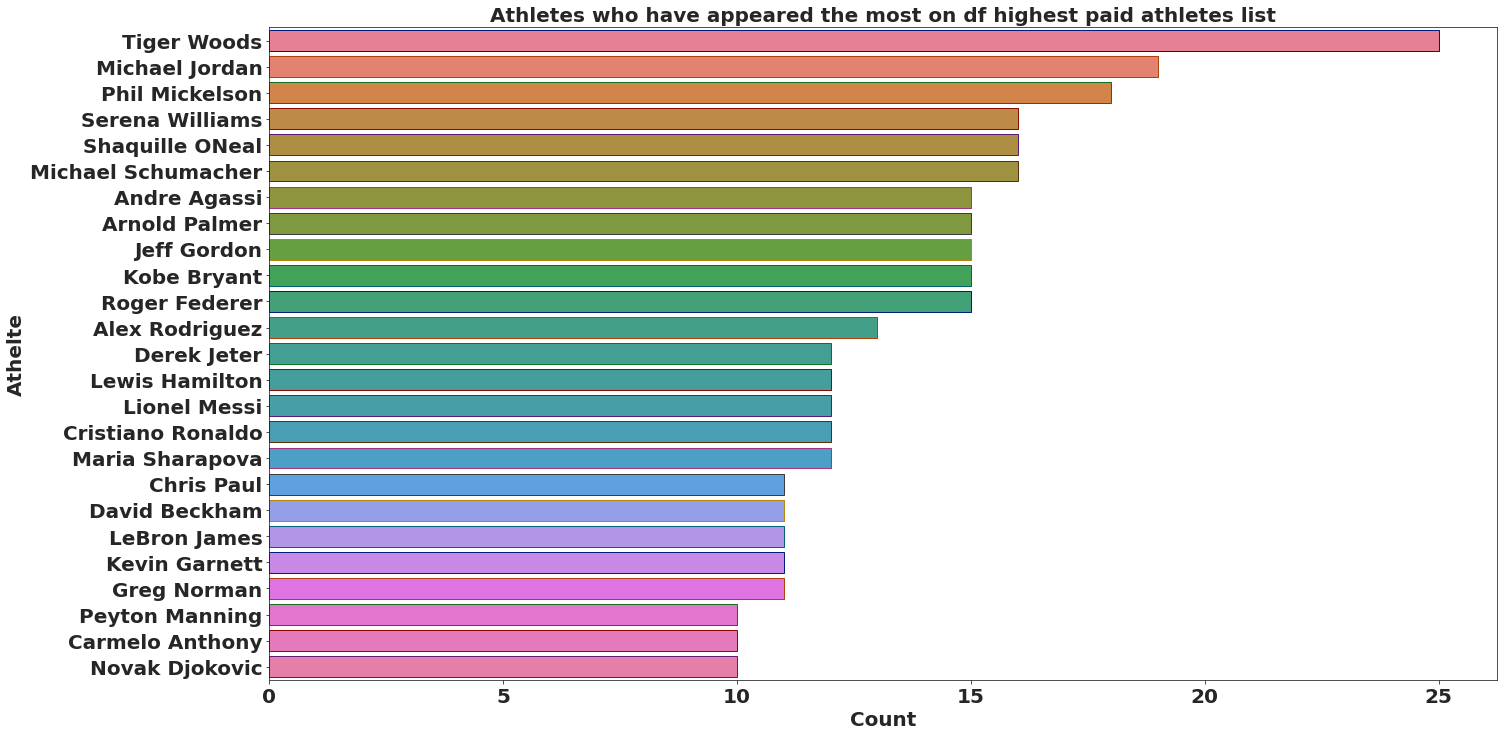

In [ ]:
# Matplotlib (plt), Seaborn (sns)
sns.set_style('ticks')
plt.subplots(figsize=(22,12))
sns.barplot(y='Name',x='Count',data=most_25,palette='husl',edgecolor=sns.color_palette('dark',10))
plt.xlabel("Count",fontsize=20,weight='bold')
plt.ylabel("Athelte",fontsize=20,weight='bold')
plt.xticks(weight='bold',fontsize=20)
plt.yticks(weight='bold',fontsize=20)
plt.title('Athletes who have appeared the most on df highest paid athletes list',weight='bold',fontsize=20)
plt.show()

### The 25 richest athletes on the df list

In [ ]:
rich_25 = df.groupby(['Name'])['Earnings(Million)'].sum().reset_index().sort_values('Earnings(Million)',ascending=False)[:25]
rich_25

,Name,Earnings(Million)
494,Tiger Woods,1632.2
182,Floyd Mayweather,944.5
108,Cristiano Ronaldo,942.9
449,Roger Federer,933.1
327,Lionel Messi,911.5
317,LeBron James,820.5
422,Phil Mickelson,781.7
369,Michael Jordan,739.2
372,Michael Schumacher,703.0
304,Kobe Bryant,621.0


### Plotting these 25 athletes

In [ ]:
#Plotly
fig = px.bar(rich_25, x = 'Earnings(Million)', y = 'Name', title= 'Total Earnings(Million) for athletes on the df list between 1990-2021',color='Name', 
labels={"Name": "Athlete", "Earnings(Million)": "Total Earnings(Million)"})
fig.update_layout(yaxis_categoryorder = 'total ascending', height=600, width=1100)
fig.show()

### Plotting the Earnings(Million) of each athlete

In [ ]:
import random

In [ ]:
names = df['Name'].unique()

In [ ]:
run = True
while run:
  athlete_input = input('Would you like to enter the name of the athlete that is plotted? (Yes or No): ').lower().strip()
  if athlete_input != 'yes' and athlete_input != 'no':
    print('Please enter Yes or No!!')
  if athlete_input == 'yes':
    while True:
      athlete_name = input("Enter the athlete's name: ")
      if athlete_name == 'random':
        athlete_input = 'no'
        break
      if athlete_name not in df['Name'].values:
        print("Please enter a valid athlete name or type 'random' for a random name!!\n")
      else:
        run = False
        break  
  if athlete_input == 'no':
    athlete_name = random.choice(names)
    break

print(f"Selected athlete: {athlete_name}")

KeyboardInterrupt: ignored

In [ ]:
athlete = df[df['Name']==athlete_name]
sns.set_style('darkgrid')
years = athlete['Year'].unique()
if len(years) <= 1:
    print(f"{athlete_name} only has earnings data for one year, cannot generate line plot.")
    print("Here are the athlete's data\n", athlete)
else:
    plt.subplots(figsize=(18,6))
    sns.lineplot(x='Year',y='Earnings(Million)',data=athlete)
    sns.set_style('darkgrid')
    plt.title(f"Earnings over time for {athlete_name}")
    plt.xlabel("Year")
    plt.ylabel("Earnings (Million)")
    plt.show()

### Earnings(Million) for athletes over the years (1990-2021)

In [ ]:
yearwise_earning = df.groupby('Year').sum()
yearwise_earning.sort_values('Earnings(Million)',ascending=False)

plt.figure(figsize=(25,8))
ax = sns.barplot(x=yearwise_earning.index, y='Earnings(Million)', data=yearwise_earning)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Earnings (Million)', fontsize=20)
plt.title("Earnings(Million) for athletes over the years 1990-2021",fontsize= 25,weight='bold')
plt.xticks(rotation=90,weight='bold',fontsize=20)
plt.yticks(weight='bold',fontsize=20)
plt.show()

### The top 25 countries based on the provided Earnings(Million)

In [ ]:
top_25_country = df.groupby(['Nationality'])['Earnings(Million)'].sum().reset_index().sort_values('Earnings(Million)',ascending=False)[:25]
top_25_country

In [ ]:
# Plotly
fig = px.bar(top_25_country, x = 'Earnings(Million)', y = 'Nationality', title= 'Countries which produce the maximum earners in Sports',color='Nationality', 
labels={"Nationality": "Country", "Earnings(Million)": "Total Earnings(Million)"})
fig.update_layout(yaxis_categoryorder = 'total ascending')
fig.show()

In [ ]:
# Matplotlib (plt), Seaborn (sns)
top_25_country=df.groupby(by='Nationality').sum().sort_values('Earnings(Million)',ascending=False)[:25]
top_25_country

plt.figure(figsize=(22,10))
sns.barplot(x=top_25_country.index,y='Earnings(Million)', data=top_25_country)
for i in range(len(top_25_country.index)):
        plt.text(i,top_25_country['Earnings(Million)'][i],top_25_country['Earnings(Million)'][i], ha = 'center',bbox = dict(facecolor = 'yellow', alpha =.4))

        
plt.title("Nationwise Earnings(Million) for athletes",fontsize= 20)
plt.xticks(rotation=90,weight='bold',fontsize=16)
plt.xlabel('Country',weight='bold',fontsize=16)
plt.ylabel('Total Earnings(Million)',weight='bold',fontsize=16)
plt.yticks(weight='bold',fontsize=16)
plt.show()

### Top 25 sports earnings(Million) for specific sports and countries

In [ ]:
top_25_country_sport = df.groupby(by=['Nationality','Sport'])['Earnings(Million)'].sum().reset_index().sort_values('Earnings(Million)', ascending=False)[:25]
top_25_country_sport

### Top sports earnings(Million) for specific sports and unique countries

In [ ]:
max_earning = top_25_country_sport.groupby(by=['Nationality'])['Earnings(Million)'].transform(max) == top_25_country_sport['Earnings(Million)']
max_earning_sport_country = top_25_country_sport[max_earning].reset_index(drop=True)
max_earning_sport_country = max_earning_sport_country.drop_duplicates(subset=["Nationality", 'Earnings(Million)'], keep='last').reset_index(drop=True)[:25]
max_earning_sport_country

### Plotting our results

In [ ]:
sport = max_earning_sport_country['Sport'].values

In [ ]:
plt.figure(figsize=(50,30))
g=sns.barplot(x=max_earning_sport_country['Nationality'],y=max_earning_sport_country['Earnings(Million)'], data=max_earning_sport_country,palette='inferno')
index = 0
for value in max_earning_sport_country['Earnings(Million)'].values:
    g.text(index,value-0.2,str(sport[index] + '-' +str(value)), color='#000', size=18, ha="center", bbox = dict(facecolor = 'yellow', alpha =.4))
    index += 1

plt.title("Top Earnings(Million) from specific sports of the top countries",fontsize= 20)
plt.xticks(rotation=90,weight='bold',fontsize=16)
plt.xlabel('Country',weight='bold',fontsize=16)
plt.ylabel('Total Earnings(Million)',weight='bold',fontsize=16)
plt.yticks(weight='bold',fontsize=16)
plt.show()

In [ ]:
sports=df.groupby(by='Sport').sum().sort_values('Earnings(Million)',ascending=False)
plt.figure(figsize=(22,10))
sns.barplot(x=sports.index,y='Earnings(Million)', data=sports)
for i in range(len(sports.index)):
        plt.text(i,sports['Earnings(Million)'][i],sports['Earnings(Million)'][i], ha = 'center',bbox = dict(facecolor = 'yellow', alpha =.4))

        
plt.title("Sportswise Earnings(Million)",fontsize= 20)
plt.xticks(rotation=90,weight='bold',fontsize=16)
plt.xlabel('Sport',weight='bold',fontsize=16)
plt.ylabel('Total Earnings(Million)',weight='bold',fontsize=16)
plt.yticks(weight='bold',fontsize=16)
plt.show()